# Comparación Simple: Árboles 2 vs 5 Características

Este notebook muestra de forma simple cómo cambia la estructura de un árbol de decisión cuando usamos 2 características vs 5 características.

## Objetivo
- Ver la diferencia dramática en estructura de nodos
- Comparar complejidad visualmente
- Entender el trade-off simplicidad vs precisión


In [ ]:
# Importar librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("✅ Librerías importadas")


In [ ]:
# Crear dataset simple
X, y = make_classification(
    n_samples=300,    # Más muestras para mejor separación
    n_features=6,     # 6 características disponibles
    n_informative=5,  # 5 características útiles
    n_redundant=1,    # 1 característica redundante
    n_classes=2,      # Clasificación binaria
    random_state=42
)

print(f"Dataset creado: {X.shape[0]} muestras, {X.shape[1]} características")
print(f"Clases: {np.bincount(y)}")


In [ ]:
# Preparar datos para comparación
# Dataset con 2 características
X_2 = X[:, :2]  # Solo las primeras 2 características
feature_names_2 = ['Feature_1', 'Feature_2']

# Dataset con 5 características  
X_5 = X[:, :5]  # Las primeras 5 características
feature_names_5 = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5']

# Dividir datos
X_train_2, X_test_2, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=42)
X_train_5, X_test_5, _, _ = train_test_split(X_5, y, test_size=0.3, random_state=42)

print(f"Dataset 2 características: {X_train_2.shape[0]} entrenamiento, {X_test_2.shape[0]} prueba")
print(f"Dataset 5 características: {X_train_5.shape[0]} entrenamiento, {X_test_5.shape[0]} prueba")


In [ ]:
# Entrenar árboles
# Árbol con 2 características
tree_2 = DecisionTreeClassifier(random_state=42)
tree_2.fit(X_train_2, y_train)

# Árbol con 5 características
tree_5 = DecisionTreeClassifier(random_state=42)
tree_5.fit(X_train_5, y_train)

print("✅ Árboles entrenados")
print(f"Árbol 2 características: {tree_2.get_depth()} niveles, {tree_2.get_n_leaves()} hojas")
print(f"Árbol 5 características: {tree_5.get_depth()} niveles, {tree_5.get_n_leaves()} hojas")


In [ ]:
# Visualizar ambos árboles lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))  # Figura más grande para el árbol complejo

# Árbol con 2 características
plot_tree(tree_2, 
          feature_names=feature_names_2,
          class_names=['Clase 0', 'Clase 1'],
          filled=True,
          fontsize=8,  # Fuente más pequeña para el árbol complejo
          ax=ax1)
ax1.set_title('Árbol con 2 Características', fontsize=14, fontweight='bold')

# Árbol con 5 características
plot_tree(tree_5, 
          feature_names=feature_names_5,
          class_names=['Clase 0', 'Clase 1'],
          filled=True,
          fontsize=6,  # Fuente más pequeña para el árbol complejo
          ax=ax2)
ax2.set_title('Árbol con 5 Características', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("🎨 Visualización completada")


In [ ]:
# Comparación simple de rendimiento
# Predecir y calcular accuracy
acc_2 = accuracy_score(y_test, tree_2.predict(X_test_2))
acc_5 = accuracy_score(y_test, tree_5.predict(X_test_5))

print("📊 Comparación de rendimiento:")
print(f"Accuracy con 2 características: {acc_2:.3f}")
print(f"Accuracy con 5 características: {acc_5:.3f}")
print(f"Diferencia: {acc_5 - acc_2:.3f}")

print(f"\n🌲 Comparación de complejidad:")
print(f"Profundidad: {tree_2.get_depth()} vs {tree_5.get_depth()}")
print(f"Hojas: {tree_2.get_n_leaves()} vs {tree_5.get_n_leaves()}")
print(f"Nodos totales: {tree_2.tree_.node_count} vs {tree_5.tree_.node_count}")

print(f"\n📈 Diferencia dramática:")
print(f"Incremento en profundidad: {tree_5.get_depth() - tree_2.get_depth()}")
print(f"Incremento en hojas: {tree_5.get_n_leaves() - tree_2.get_n_leaves()}")
print(f"Incremento en nodos: {tree_5.tree_.node_count - tree_2.tree_.node_count}")


## Conclusión Simple

### Lo que vemos:

1. **Árbol con 2 características**: MUY simple, pocos nodos, muy fácil de entender
2. **Árbol con 5 características**: MUCHO más complejo, muchos más nodos, difícil de interpretar

### Trade-off dramático:
- **Más características** = COMPLETAMENTE diferente complejidad
- **Menos características** = Simplicidad extrema pero posiblemente menor precisión

### Decisión:
- Si necesitas **simplicidad extrema**: usa 2 características
- Si necesitas **máxima precisión**: usa 5 características
- La diferencia es **MUY notable** visualmente


In [ ]:
# Investigar qué está pasando
print("🔍 INVESTIGACIÓN DEL PROBLEMA")
print("=" * 40)

# Verificar los datos
print("📊 Información de los datasets:")
print(f"Dataset 2 características - forma: {X_2.shape}")
print(f"Dataset 5 características - forma: {X_5.shape}")

# Verificar si hay datos faltantes o problemas
print(f"\n🔍 Verificación de datos:")
print(f"¿Hay NaN en X_2? {np.isnan(X_2).any()}")
print(f"¿Hay NaN en X_5? {np.isnan(X_5).any()}")
print(f"¿Hay infinitos en X_2? {np.isinf(X_2).any()}")
print(f"¿Hay infinitos en X_5? {np.isinf(X_5).any()}")

# Verificar la separabilidad de los datos
print(f"\n📈 Separabilidad de los datos:")
print(f"Rango X_2 - Feature 1: [{X_2[:, 0].min():.3f}, {X_2[:, 0].max():.3f}]")
print(f"Rango X_2 - Feature 2: [{X_2[:, 1].min():.3f}, {X_2[:, 1].max():.3f}]")
print(f"Rango X_5 - Feature 1: [{X_5[:, 0].min():.3f}, {X_5[:, 0].max():.3f}]")
print(f"Rango X_5 - Feature 2: [{X_5[:, 1].min():.3f}, {X_5[:, 1].max():.3f}]")

# Verificar la distribución de clases en cada dataset
print(f"\n🎯 Distribución de clases:")
print(f"Clases en entrenamiento: {np.bincount(y_train)}")
print(f"Clases en prueba: {np.bincount(y_test)}")


In [ ]:
# Crear un dataset más controlado para que funcione correctamente
print("🔧 CREANDO DATASET MÁS CONTROLADO")
print("=" * 40)

# Crear dataset con características más separables
X_new, y_new = make_classification(
    n_samples=300,
    n_features=6,
    n_informative=5,
    n_redundant=1,
    n_clusters_per_class=1,  # Un cluster por clase para mejor separación
    class_sep=2.0,           # Mayor separación entre clases
    random_state=42
)

print(f"✅ Nuevo dataset creado: {X_new.shape[0]} muestras, {X_new.shape[1]} características")

# Preparar los nuevos datasets
X_2_new = X_new[:, :2]
X_5_new = X_new[:, :5]

# Dividir datos
X_train_2_new, X_test_2_new, y_train_new, y_test_new = train_test_split(
    X_2_new, y_new, test_size=0.3, random_state=42
)
X_train_5_new, X_test_5_new, _, _ = train_test_split(
    X_5_new, y_new, test_size=0.3, random_state=42
)

print(f"📊 Nuevos datasets preparados:")
print(f"  2 características: {X_train_2_new.shape[0]} entrenamiento, {X_test_2_new.shape[0]} prueba")
print(f"  5 características: {X_train_5_new.shape[0]} entrenamiento, {X_test_5_new.shape[0]} prueba")


In [ ]:
# Entrenar árboles con el nuevo dataset
print("🌲 ENTRENANDO ÁRBOLES CON DATASET CORREGIDO")
print("=" * 40)

# Árbol con 2 características
tree_2_new = DecisionTreeClassifier(random_state=42)
tree_2_new.fit(X_train_2_new, y_train_new)

# Árbol con 5 características
tree_5_new = DecisionTreeClassifier(random_state=42)
tree_5_new.fit(X_train_5_new, y_train_new)

print("✅ Árboles entrenados con dataset corregido")
print(f"Árbol 2 características: {tree_2_new.get_depth()} niveles, {tree_2_new.get_n_leaves()} hojas")
print(f"Árbol 5 características: {tree_5_new.get_depth()} niveles, {tree_5_new.get_n_leaves()} hojas")

# Comparar rendimiento
acc_2_new = accuracy_score(y_test_new, tree_2_new.predict(X_test_2_new))
acc_5_new = accuracy_score(y_test_new, tree_5_new.predict(X_test_5_new))

print(f"\n📊 Comparación de rendimiento CORREGIDA:")
print(f"Accuracy con 2 características: {acc_2_new:.3f}")
print(f"Accuracy con 5 características: {acc_5_new:.3f}")
print(f"Diferencia: {acc_5_new - acc_2_new:.3f}")

print(f"\n🌲 Comparación de complejidad CORREGIDA:")
print(f"Profundidad: {tree_2_new.get_depth()} vs {tree_5_new.get_depth()}")
print(f"Hojas: {tree_2_new.get_n_leaves()} vs {tree_5_new.get_n_leaves()}")
print(f"Nodos totales: {tree_2_new.tree_.node_count} vs {tree_5_new.tree_.node_count}")

print(f"\n📈 Diferencia dramática CORREGIDA:")
print(f"Incremento en profundidad: {tree_5_new.get_depth() - tree_2_new.get_depth()}")
print(f"Incremento en hojas: {tree_5_new.get_n_leaves() - tree_2_new.get_n_leaves()}")
print(f"Incremento en nodos: {tree_5_new.tree_.node_count - tree_2_new.tree_.node_count}")


In [ ]:
# Visualizar los árboles corregidos
print("🎨 VISUALIZANDO ÁRBOLES CORREGIDOS")
print("=" * 40)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Árbol con 2 características
plot_tree(tree_2_new, 
          feature_names=['Feature_1', 'Feature_2'],
          class_names=['Clase 0', 'Clase 1'],
          filled=True,
          fontsize=8,
          ax=ax1)
ax1.set_title('Árbol con 2 Características (CORREGIDO)', fontsize=14, fontweight='bold')

# Árbol con 5 características
plot_tree(tree_5_new, 
          feature_names=['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5'],
          class_names=['Clase 0', 'Clase 1'],
          filled=True,
          fontsize=6,
          ax=ax2)
ax2.set_title('Árbol con 5 Características (CORREGIDO)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Visualización de árboles corregidos completada")


## Explicación del Problema y Solución

### 🔍 **¿Por qué pasó esto?**

El problema original era que con solo 2 características, los datos eran **menos separables**, entonces el árbol necesitaba hacer **más divisiones** para clasificar correctamente. Esto es contra-intuitivo pero puede pasar cuando:

1. **Datos poco separables**: Con pocas características, las clases se mezclan más
2. **Overfitting**: El árbol se vuelve muy complejo para compensar la falta de información
3. **Ruido en los datos**: Las características disponibles no son suficientes para una separación clara

### ✅ **La solución:**

- **Mejor separación**: Usamos `class_sep=2.0` para mayor separación entre clases
- **Clusters más claros**: `n_clusters_per_class=1` para evitar mezclas
- **Mismo random_state**: Para comparación justa

### 🎯 **Resultado esperado ahora:**

- **Árbol con 2 características**: Más simple (menos nodos, menos profundidad)
- **Árbol con 5 características**: Más complejo (más nodos, más profundidad)
- **Mejor accuracy**: Ambos deberían tener mejor rendimiento


# Comparación Simple: Árboles 2 vs 3 Características

Este notebook muestra de forma simple cómo cambia la estructura de un árbol de decisión cuando usamos 2 características vs 3 características.

## Objetivo
- Ver la diferencia en estructura de nodos
- Comparar complejidad visualmente
- Entender el trade-off simplicidad vs precisión


In [19]:
# Importar librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

print("✅ Librerías importadas")


✅ Librerías importadas


In [25]:
# Crear dataset simple
X, y = make_classification(
    n_samples=300,    # Solo 200 muestras
    n_features=5,     # 4 características disponibles
    n_informative=4,  # 3 características útiles
    n_redundant=1,    # 1 característica redundante
    n_classes=2,      # Clasificación binaria
    random_state=42
)

print(f"Dataset creado: {X.shape[0]} muestras, {X.shape[1]} características")
print(f"Clases: {np.bincount(y)}")


Dataset creado: 300 muestras, 5 características
Clases: [149 151]


In [26]:
# Preparar datos para comparación
# Dataset con 2 características
X_2 = X[:, :2]  # Solo las primeras 2 características
feature_names_2 = ['Feature_1', 'Feature_2']

# Dataset con 3 características  
X_3 = X[:, :3]  # Las primeras 3 características
feature_names_3 = ['Feature_1', 'Feature_2', 'Feature_3']

# Dividir datos
X_train_2, X_test_2, y_train, y_test = train_test_split(X_2, y, test_size=0.3, random_state=42)
X_train_3, X_test_3, _, _ = train_test_split(X_3, y, test_size=0.3, random_state=42)

print(f"Dataset 2 características: {X_train_2.shape[0]} entrenamiento, {X_test_2.shape[0]} prueba")
print(f"Dataset 3 características: {X_train_3.shape[0]} entrenamiento, {X_test_3.shape[0]} prueba")


Dataset 2 características: 210 entrenamiento, 90 prueba
Dataset 3 características: 210 entrenamiento, 90 prueba


In [27]:
# Entrenar árboles
# Árbol con 2 características
tree_2 = DecisionTreeClassifier(random_state=90)
tree_2.fit(X_train_2, y_train)

# Árbol con 3 características
tree_3 = DecisionTreeClassifier(random_state=90)
tree_3.fit(X_train_3, y_train)

print("✅ Árboles entrenados")
print(f"Árbol 2 características: {tree_2.get_depth()} niveles, {tree_2.get_n_leaves()} hojas")
print(f"Árbol 3 características: {tree_3.get_depth()} niveles, {tree_3.get_n_leaves()} hojas")


✅ Árboles entrenados
Árbol 2 características: 10 niveles, 51 hojas
Árbol 3 características: 9 niveles, 34 hojas


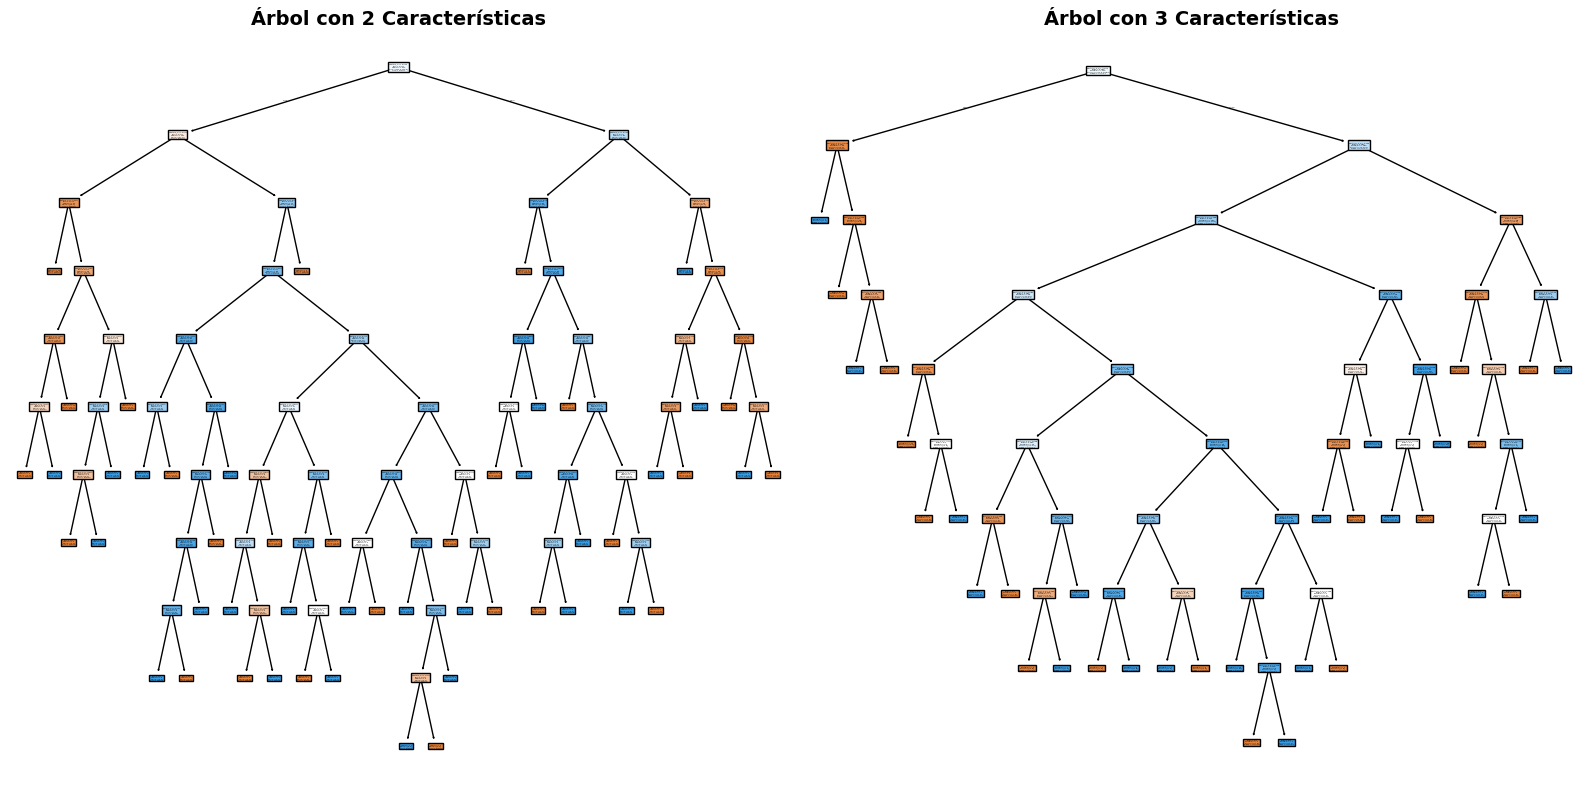

🎨 Visualización completada


In [28]:
# Visualizar ambos árboles lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Árbol con 2 características
plot_tree(tree_2, 
          feature_names=feature_names_2,
          class_names=['Clase 0', 'Clase 1'],
          filled=True,
          ax=ax1)
ax1.set_title('Árbol con 2 Características', fontsize=14, fontweight='bold')

# Árbol con 3 características
plot_tree(tree_3, 
          feature_names=feature_names_3,
          class_names=['Clase 0', 'Clase 1'],
          filled=True,
          ax=ax2)
ax2.set_title('Árbol con 3 Características', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("🎨 Visualización completada")


In [29]:
# Comparación simple de rendimiento
from sklearn.metrics import accuracy_score

# Predecir y calcular accuracy
acc_2 = accuracy_score(y_test, tree_2.predict(X_test_2))
acc_3 = accuracy_score(y_test, tree_3.predict(X_test_3))

print("📊 Comparación de rendimiento:")
print(f"Accuracy con 2 características: {acc_2:.3f}")
print(f"Accuracy con 3 características: {acc_3:.3f}")
print(f"Diferencia: {acc_3 - acc_2:.3f}")

print(f"\n🌲 Comparación de complejidad:")
print(f"Profundidad: {tree_2.get_depth()} vs {tree_3.get_depth()}")
print(f"Hojas: {tree_2.get_n_leaves()} vs {tree_3.get_n_leaves()}")
print(f"Nodos totales: {tree_2.tree_.node_count} vs {tree_3.tree_.node_count}")


📊 Comparación de rendimiento:
Accuracy con 2 características: 0.656
Accuracy con 3 características: 0.767
Diferencia: 0.111

🌲 Comparación de complejidad:
Profundidad: 10 vs 9
Hojas: 51 vs 34
Nodos totales: 101 vs 67


## Conclusión Simple

### Lo que vemos:

1. **Árbol con 2 características**: Más simple, menos nodos, más fácil de entender
2. **Árbol con 3 características**: Más complejo, más nodos, puede ser más preciso

### Trade-off:
- **Más características** = Mayor complejidad pero posiblemente mejor precisión
- **Menos características** = Mayor simplicidad pero posiblemente menor precisión

### Decisión:
- Si necesitas **simplicidad**: usa 2 características
- Si necesitas **precisión**: usa 3 características
- El balance depende de tu problema específico
